In [1]:
from PIL import Image, ImageDraw, ImageEnhance
import numpy as np 
import matplotlib.pyplot as plt
import math
import copy
import datetime

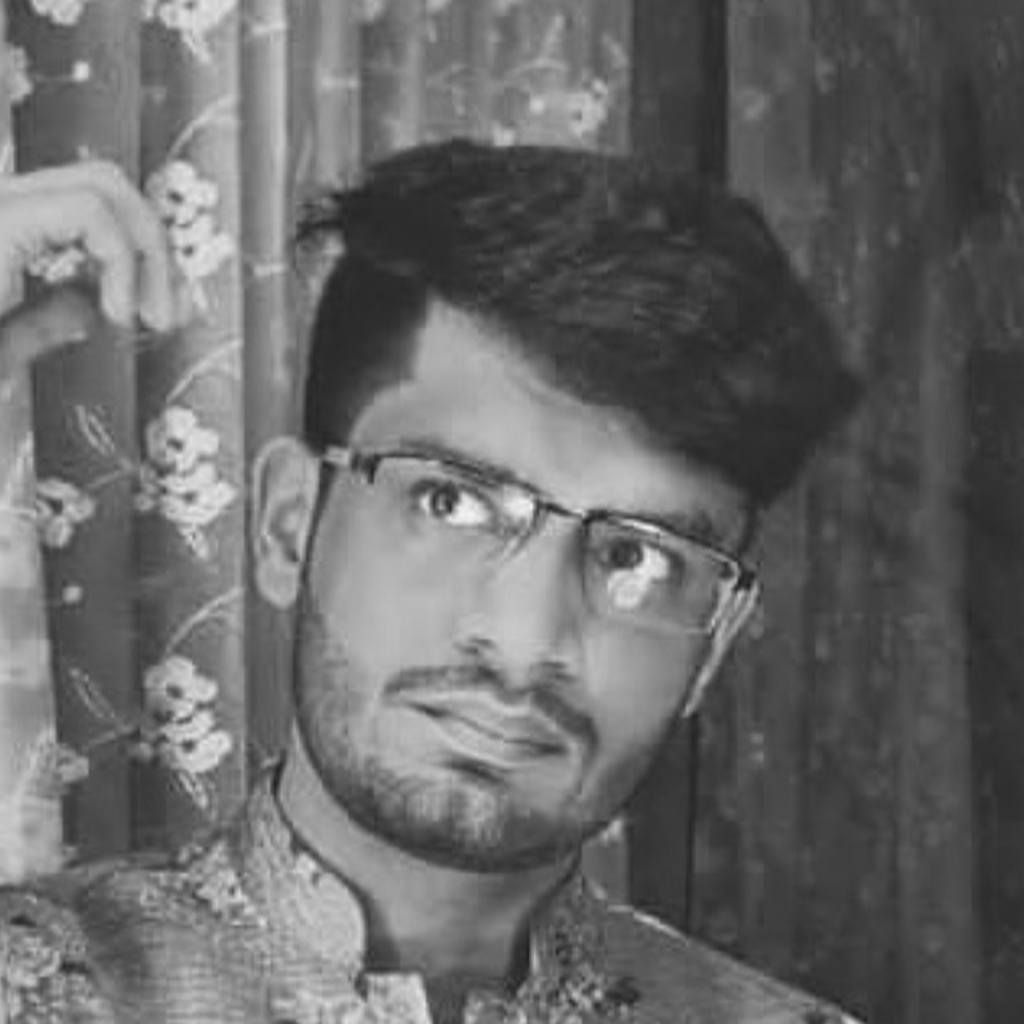

In [2]:
# parameters 
IMAGE_PATH = "202105020400151.png"
IMAGE_SIZE = 1024
N = 300
LIST_POINTS = []
NUMBER_OF_LINES = 1400

# load the image 
img = Image.open(IMAGE_PATH)

# crop image to a square 
width, height = img.size
minDimen = min([width, height])
img = img.crop((int((width-minDimen)/2), 
              int((height-minDimen)/2), 
              minDimen + int((width-minDimen)/2), 
              minDimen + int((height-minDimen)/2)))
img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
img = img.convert("L")
img

In [3]:
# common functions

def get_list_of_points_in_circle(n,img_size):
    """get a list of points lying on the circle"""
    # create circle with points 
    a = np.linspace(-np.pi, np.pi, n)[:n-1]
    x = (np.sin(a) + np.ones(N-1))*(img_size/2 -10 )
    y = (np.cos(a) + np.ones(N-1))*(img_size/2 -10 )
    cord = np.array((x.astype(int),y.astype(int))).T
    return cord

def get_cordinates_list_that_are_far(cord, start):
    
    for i, item in enumerate(cord):
        if start[0] == item[0] and start[1] == item[1]:
            index = i
    i = index  
    re = 24
    if i > re and len(cord) - i > re:
        a = cord[:i-re]
        b = cord[i+re:]
        new_cord = np.concatenate((a,b),axis=0)
    elif i < re:
        new_cord = cord[i+re:i-re]
    elif i == re:
        new_cord = cord[i+re:]
    elif len(cord) - i == re:
        new_cord = cord[:len(cord)]
    elif i > len(cord) - re:
        new_cord = cord[re -(len(cord)-i):i-re]
    else: 
        new_cord  = cord[:]
    return new_cord
    
    
def get_points_on_a_line(start, end):
    """get all the pixles belonging on the particular line and return list
    Bresenham's line algorithm
    enter>> get_points_on_a_line((0,0),(3,4))
    return>> [(0, 0), (1, 1), (1, 2), (2, 3), (3, 4)]
    """
    # initial condition 
    x1, y1 = start
    x2, y2 = end 
    dx = x2-x1
    dy = y2-y1
    
    # check if line is steep
    is_steep = abs(dy) > abs(dx)
    
    # if steep make it unsteep by reversing coordinates 
    if is_steep:
        x1, y1 = y1, x1
        x2, y2 = y2, x2 
    
    # swap to analize left to right only
    swapped = False 
    if x1 > x2:
        x1, x2 = x2, x1
        y1, y2 = y2, y1 
        swapped = True 
        
    # recalculate deffrence 
    dx = x2 - x1
    dy = y2 - y1
    
    # calculate error 
    error = int(dx/2.0)
    ystep = 1 if y1 < y2 else -1 
    
    # Iterate over bounding box generating points between start and end
    y = y1 
    points = []
    for x in range(x1,x2+1):
        coord = (int(y),int(x)) if is_steep else (int(x),int(y))
        points.append(coord)
        error -= abs(dy)
        if error < 0:
            y += ystep
            error += dx
            
    if swapped:
        points.reverse()
    return points

def get_best_line(start, list_points, image1):
    """return the end point twhere the line must be drawn to"""
    avg = []
    for i in list_points:
        line_list = get_points_on_a_line(start, i)
        #print(line_list)
        a = []
        for j in line_list:
            b = image1.getpixel(j)
            a.append(b)
        average = int(sum(a) / float(len(a)))
        avg.append(average)
    index_max = avg.index(min(avg))
    return list_points[index_max]
        
def draw_line(start, end, image1,colour):
    """ draw line on the immage with fill and width   """
    x1, y1 = start
    x2, y2 = end
    draw1 = ImageDraw.Draw(image1)
    draw1.line([x1,y1, x2, y2],fill =colour , width = 1 )
    return (image1)


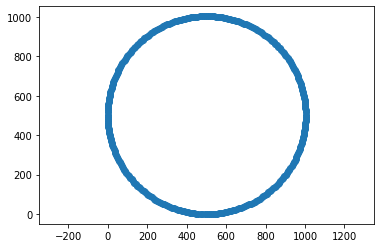

In [4]:
# number of points 
cordinates = get_list_of_points_in_circle(N,IMAGE_SIZE)
#plot the circle 
plt.scatter(*zip(*cordinates))
plt.axis('equal')
plt.show()

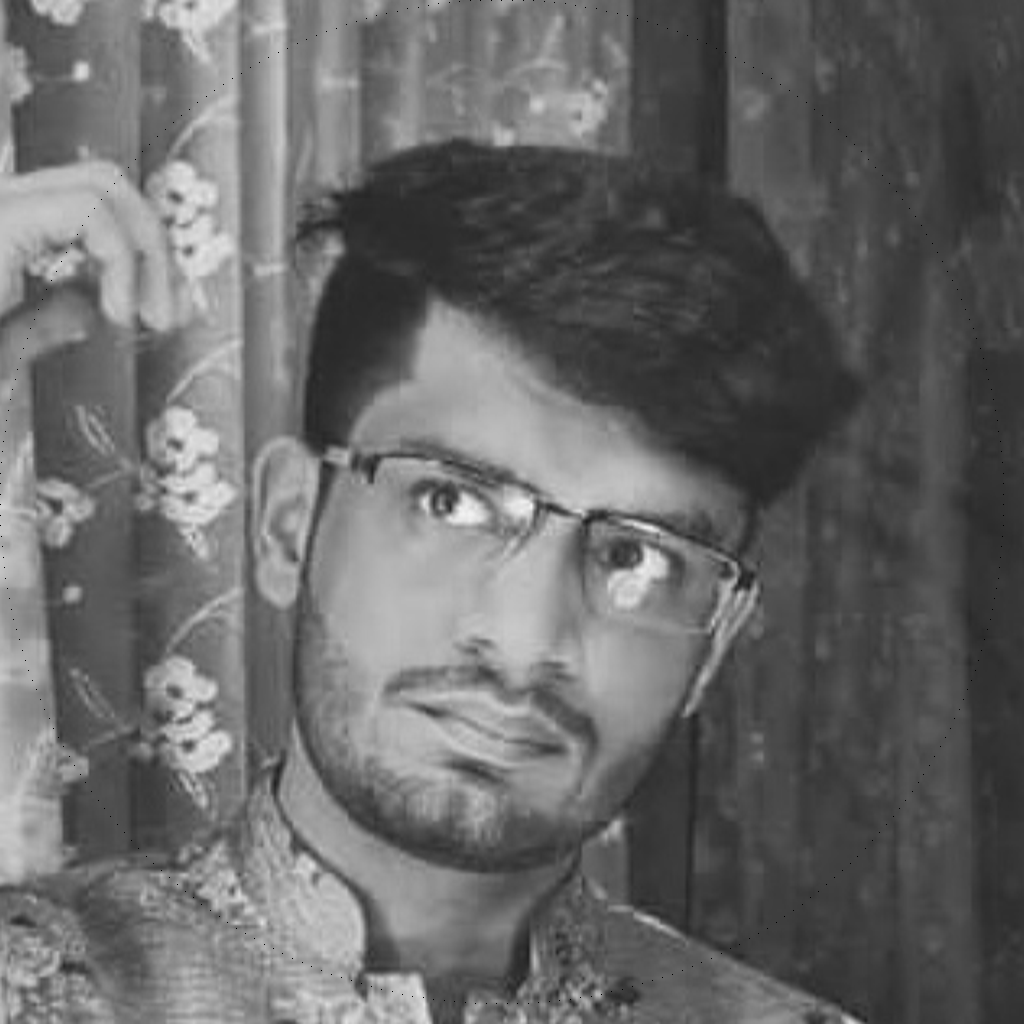

In [5]:
# make the circle on the image 
draw = ImageDraw.Draw(img)
for i in cordinates:
    draw.point(i, fill=0)
img

In [6]:
# create new image 
imgNew = Image.new("L",(IMAGE_SIZE,IMAGE_SIZE),255)
imgNew
drawNew = ImageDraw.Draw(imgNew)
for i in cordinates:
    drawNew.point(i, fill=0)

In [7]:
LIST_POINTS = []
start_point = tuple(cordinates[80])
LIST_POINTS.append(start_point)
a = []

for i in range(NUMBER_OF_LINES):
    
    a.append(datetime.datetime.now())
    cords_new = get_cordinates_list_that_are_far(cordinates, start_point)
    greedy_point = get_best_line(start_point, cords_new, img)
    draw_line(start_point,greedy_point,img,(255))
    draw_line(start_point,greedy_point,imgNew,(0))
    LIST_POINTS.append(greedy_point)
    start_point = tuple(greedy_point)
    if i%10 == 0: 
        c = a[-1] - a[0]
        a = []
        print(i,"iteration --------------------------",c)
    if i%50 == 0:
        img.save(str(i)+"-target-"+IMAGE_PATH)
        print("---------------------------------image_saved--------------------------------")
        imgNew.save(str(i)+"-result-"+IMAGE_PATH)
        print("---------------------------------image_saved--------------------------------")
        
    
print("done")    
    

0 iteration -------------------------- 0:00:00
---------------------------------image_saved--------------------------------
---------------------------------image_saved--------------------------------
10 iteration -------------------------- 0:00:03.010946
20 iteration -------------------------- 0:00:02.682790
30 iteration -------------------------- 0:00:02.853988
40 iteration -------------------------- 0:00:02.866323
50 iteration -------------------------- 0:00:02.865337
---------------------------------image_saved--------------------------------
---------------------------------image_saved--------------------------------
60 iteration -------------------------- 0:00:03.115414
70 iteration -------------------------- 0:00:02.971058
80 iteration -------------------------- 0:00:03.091909
90 iteration -------------------------- 0:00:03.030894
100 iteration -------------------------- 0:00:02.871353
---------------------------------image_saved--------------------------------
-----------------

950 iteration -------------------------- 0:00:03.051837
---------------------------------image_saved--------------------------------
---------------------------------image_saved--------------------------------
960 iteration -------------------------- 0:00:02.750663
970 iteration -------------------------- 0:00:03.047855
980 iteration -------------------------- 0:00:02.887260
990 iteration -------------------------- 0:00:02.874305
1000 iteration -------------------------- 0:00:02.806480
---------------------------------image_saved--------------------------------
---------------------------------image_saved--------------------------------
1010 iteration -------------------------- 0:00:02.755629
1020 iteration -------------------------- 0:00:02.927143
1030 iteration -------------------------- 0:00:02.674874
1040 iteration -------------------------- 0:00:02.904116
1050 iteration -------------------------- 0:00:02.857357
---------------------------------image_saved--------------------------

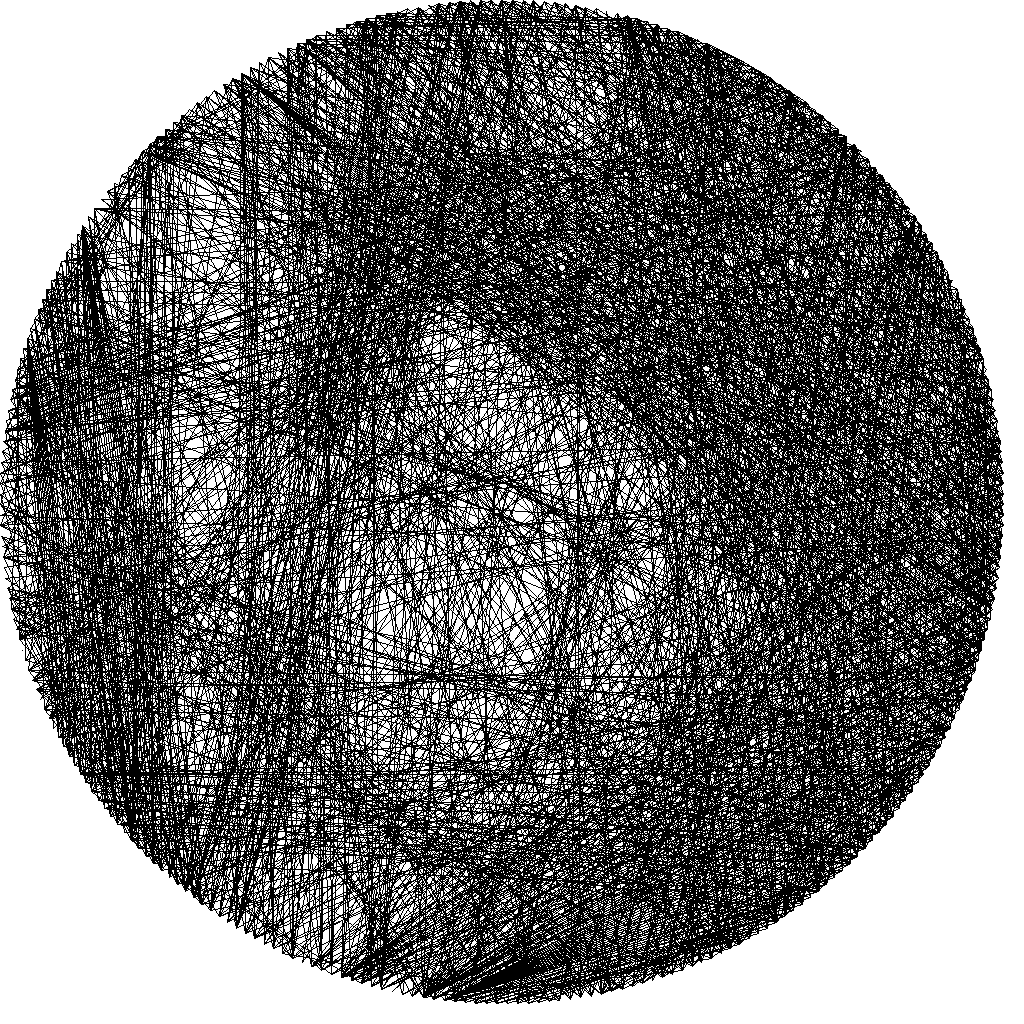

In [8]:
imgNew

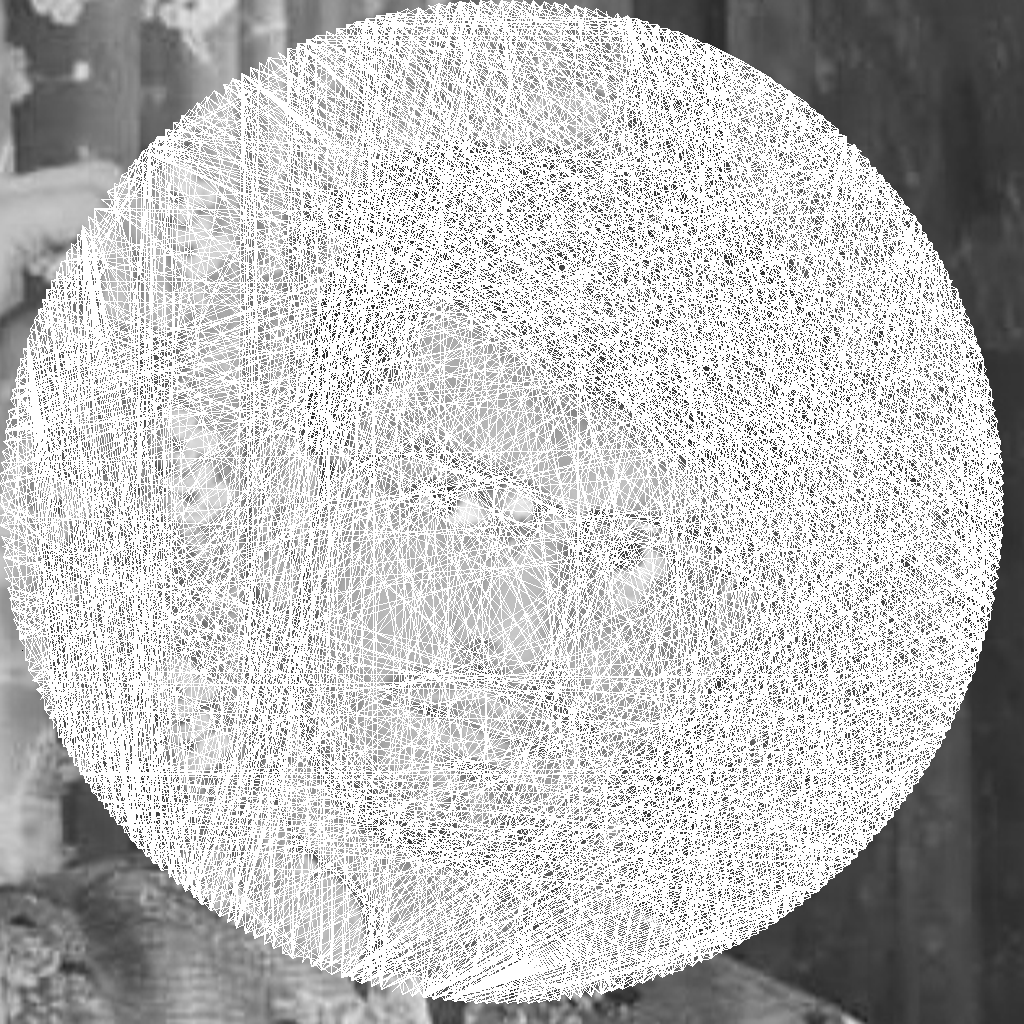

In [9]:
img